In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial
import os

# Mine
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential
from wilson_cowan_2d.kernels.kernels import make_K_2_populations
from wilson_cowan_2d.systems.nulclines import calc_cross_points, calc_nulclines_crosspoints
%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/progress_report/"
img_path = os.path.join(report_path, 'img')

[[0.         0.005      0.083      0.424     ]
 [0.00394604 0.00394725 0.00396604 0.20470882]]


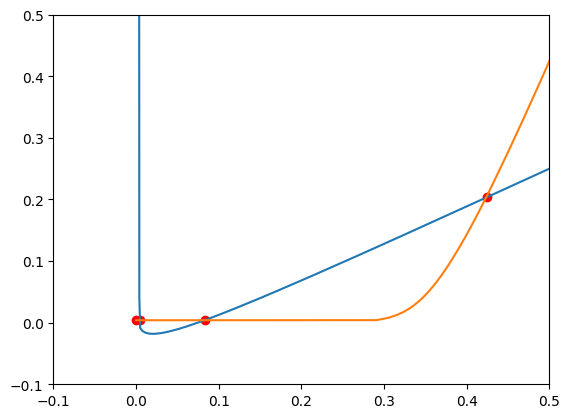

In [224]:
τ = 0.7
τe = 1
τi = τ * τe

σ = 0.8
σe = 8
σi = σ* σe

param = wck.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9)
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
u[0:2**1] = 1
v = v_str*np.ones(param.size).reshape((param.size, 1))

#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


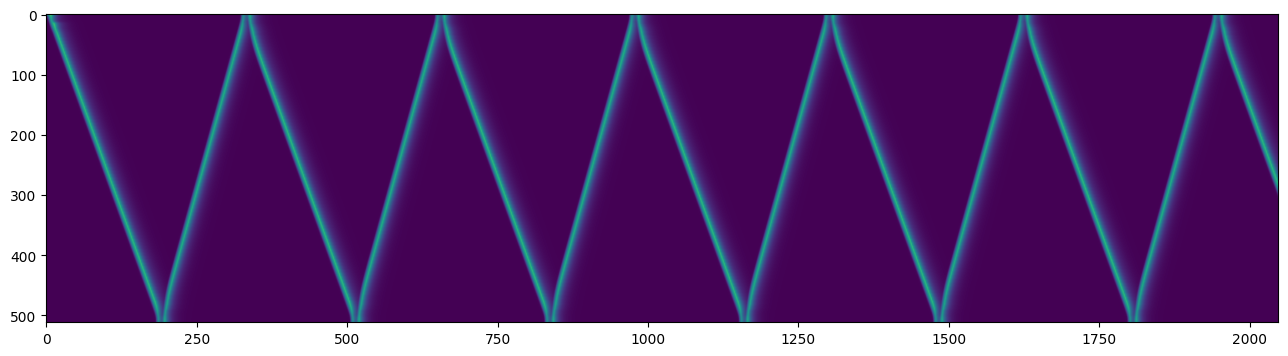

In [225]:
trv_wav = wck.WCDecExpTravelNonLocal1D(inp, param, np.array([σe, σi]))

end = 300
step = end/(param.size*4)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u, vmin=0, vmax=1)


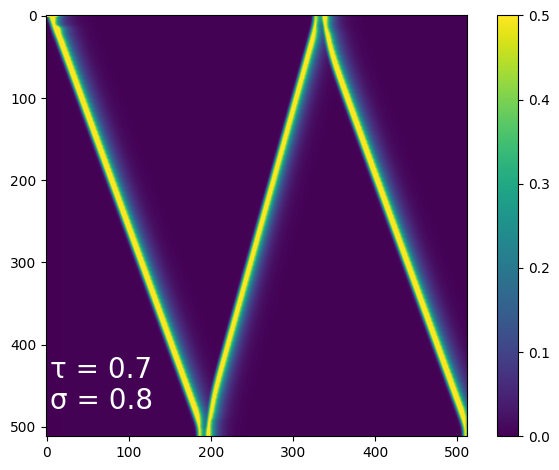

In [226]:
fig = plt.figure()
ax = plt.gca()
plt.imshow(res.u[:,:param.size], aspect='equal', vmin=0, vmax=0.5)
plt.colorbar()

fig_name = f"nonlocal_wave_sig={σ}_tau={τ}.png"
plt.text(0.01, 0.05, f"σ = {σ}",fontsize=20, color='white', ha='left', va='bottom', transform=ax.transAxes)
plt.text(0.01, 0.125, f"τ = {τ}",fontsize=20, color='white', ha='left', va='bottom', transform=ax.transAxes)
fig.tight_layout()
# plt.savefig(os.path.join(img_path, fig_name), bbox_inches='tight')

In [223]:
# fig = plt.figure(figsize=(10,20))
# # plt.imshow(np.flip(res.v[:,:300], axis=0), aspect='equal', vmin=0, vmax=0.5, cmap='Reds')# plt.colorbar()
# plt.imshow(np.flip(10*res.u[:,:300], axis=0) - 10*np.flip(res.v[:,:300], axis=0)
#            , aspect='equal', vmin=-5, vmax=5, cmap='viridis')# plt.colorbar()

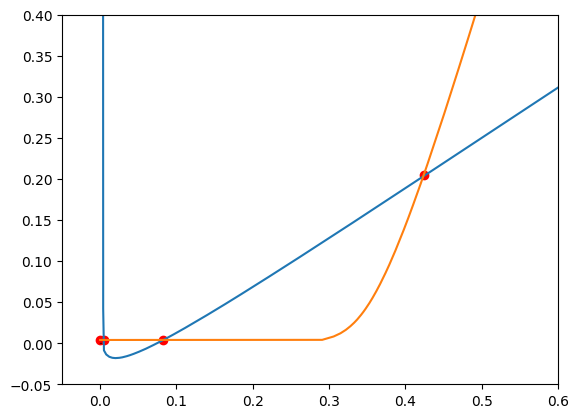

In [80]:
u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.plot(res.u[256], res.v[256], 'k', linewidth=0.5)
_ = plt.xlim(-0.05, 0.6)
_ = plt.ylim(-0.05, 0.4)